<a href="https://colab.research.google.com/github/laksh262001/Deeplearning-and-AI/blob/main/Linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip3 install -U scikit-learn scipy matplotlib
# !pip install matplotlib-venn
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [ ]:
# load the data
data = load_breast_cancer()

In [ ]:
# check the typr of data
type(data)

sklearn.utils.Bunch

In [ ]:
# note:It is a bunch object 
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 'data' (the attribute) means the input data
data.data.shape
# It has 569 samples, 30 features

(569, 30)

In [ ]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
# normally, when you have X targets, they are labelled 0...k-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
# Their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# There are also 569 corresponding targets
data.target.shape

(569,)

In [ ]:
# Yoy can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# normally we would put all of our imports at the top
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into train and test sets
# This lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [ ]:
# Scale the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Alternatively method:
# model= tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,) activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# Evalute the model - evalute() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 22ms/step - loss: 0.9233 - accuracy: 0.4331 - val_loss: 0.8248 - val_accuracy: 0.5213
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8417 - accuracy: 0.5039 - val_loss: 0.7445 - val_accuracy: 0.6011
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7696 - accuracy: 0.5617 - val_loss: 0.6756 - val_accuracy: 0.6489
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7091 - accuracy: 0.6010 - val_loss: 0.6148 - val_accuracy: 0.6968
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6555 - accuracy: 0.6194 - val_loss: 0.5628 - val_accuracy: 0.7287
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6086 - accuracy: 0.6614 - val_loss: 0.5191 - val_accuracy: 0.7394
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5682 - accuracy: 0.7034 - val_loss: 0.4812 - val_accuracy: 0.7926
Epoch 8/100


     |████████████████████████████████| 13.1 MB 4.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


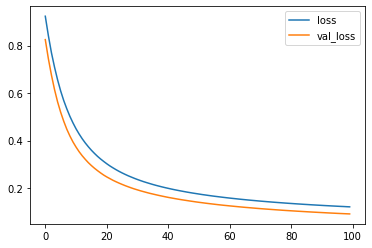

In [ ]:
# Plot what's returned by model.fit()
!pip install matplotlib==3.1.3
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

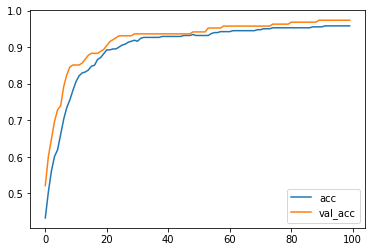

In [ ]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()